In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
jharkhand_migration = pd.read_csv("jharkhand_migration.csv")
jharkhand_migration = jharkhand_migration.copy()

In [4]:
jharkhand_migration.head(3)

,Sl#,Date,Name,Gender,Age,Occupation,State,District,Unnamed: 8,Unnamed: 9,Total ppl count,Males,Females,Pregnant,Breastfeeding,Jharkhand District,Village/ City,Panchayat/ward,Gram,Area
0,1,2020/05/02 6:20:42 PM GMT+5:30,<scrubbed>,male,30,NaN,Karnataka,Bangalore Urban,NaN,NaN,2,2,0,0,0,West Singhbhum,Sadar Chaibasa,Bai Simbia Ward 10,Bai Simbia Po-Bara Guira Ps-muffasil,Chaibasa
1,2,2020/05/02 6:28:50 PM GMT+5:30,<scrubbed>,male,39,NaN,Karnataka,Udupi,NaN,NaN,1,1,0,0,0,West Singhbhum,Tantnagar,Khathbhari,Pendargariya,0
2,3,2020/05/02 6:49:54 PM GMT+5:30,<scrubbed>,male,39,NaN,Karnataka,Bangalore Urban,NaN,NaN,1,1,0,0,0,West Singhbhum,Chaibasa,Pataguira,0,0


In [5]:
jharkhand_migration = jharkhand_migration.drop(["Name","Date","Unnamed: 8","Unnamed: 9","Area","Sl#"],axis = 1)

In [6]:
jharkhand_migration.columns

Index(['Gender', 'Age', 'Occupation', 'State', 'District', 'Total ppl count',
       'Males', 'Females', 'Pregnant', 'Breastfeeding', 'Jharkhand District',
       'Village/ City', 'Panchayat/ward', 'Gram'],
      dtype='object')

In [7]:
# 75% IS AROUND 30 
# All other are categorical
jharkhand_migration.describe()

,Age,Total ppl count,Males,Females,Pregnant,Breastfeeding
count,52102.000000,52102.000000,52102.000000,52102.000000,52102.000000,52102.000000
mean,26.991632,1.915320,1.641914,0.234425,0.035738,0.066120
std,7.928700,0.974605,0.940038,0.537079,0.299435,0.360717
min,10.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,21.000000,1.000000,1.000000,0.000000,0.000000,0.000000
50%,25.000000,2.000000,2.000000,0.000000,0.000000,0.000000
75%,30.000000,2.000000,2.000000,0.000000,0.000000,0.000000
max,97.000000,7.000000,7.000000,7.000000,6.000000,6.000000


In [8]:
jharkhand_migration.dtypes

Gender                object
Age                    int64
Occupation            object
State                 object
District              object
Total ppl count        int64
Males                  int64
Females                int64
Pregnant               int64
Breastfeeding          int64
Jharkhand District    object
Village/ City         object
Panchayat/ward        object
Gram                  object
dtype: object

In [9]:
# Convert 0,1 into categorical
# Convert Age into age brackets 
# Look for occupation 

jharkhand_migration.head()

,Gender,Age,Occupation,State,District,Total ppl count,Males,Females,Pregnant,Breastfeeding,Jharkhand District,Village/ City,Panchayat/ward,Gram
0,male,30,NaN,Karnataka,Bangalore Urban,2,2,0,0,0,West Singhbhum,Sadar Chaibasa,Bai Simbia Ward 10,Bai Simbia Po-Bara Guira Ps-muffasil
1,male,39,NaN,Karnataka,Udupi,1,1,0,0,0,West Singhbhum,Tantnagar,Khathbhari,Pendargariya
2,male,39,NaN,Karnataka,Bangalore Urban,1,1,0,0,0,West Singhbhum,Chaibasa,Pataguira,0
3,male,38,NaN,Karnataka,Bangalore Urban,1,1,0,0,0,West Singhbhum,kumardungi,chhota raikaman,"badupi ,chhota raikaman,po-andhari"
4,male,56,NaN,Karnataka,Bangalore Urban,1,1,0,0,0,West Singhbhum,manjhari,manjhari,gitilpi demkapada


In [10]:
jharkhand_migration["Occupation"].unique()

array([nan, 'Migrant Worker', 'Other Professional', 'Student', 'Tourist'],
      dtype=object)

In [11]:
# I can look for proportions of students and migrant workers out of them 
jharkhand_migration["Occupation"].value_counts()

Migrant Worker        42207
Student                1792
Other Professional     1702
Tourist                 474
Name: Occupation, dtype: int64

In [12]:
# Their are more female migranted as a result of displacement than male 
jharkhand_migration["Males"].sum()
jharkhand_migration["Females"].sum()

12214

In [13]:
# No of migrants that gave information were more males than females
jharkhand_migration["Gender"].value_counts("")

male      49163
female     2873
Other        34
Name: Gender, dtype: int64

In [14]:
# Lets see how many migrants are breastfeedings
jharkhand_migration["Breastfeeding"] = jharkhand_migration["Breastfeeding"].replace(["Yes","No"],[1,2])

In [18]:
# Group by Clause in Python to get the sum of women 
groupby_gender = jharkhand_migration["Age"].groupby(jharkhand_migration["Gender"])

In [22]:
# Age wise distribution of jharkhand migrants
jharkhand_migration.groupby(["Gender"]).agg({"Age" : ["count","mean","max","min",]})

Age                   
        count       mean max min
Gender                          
Other      34  28.882353  77  18
female   2873  26.019840  86  10
male    49163  27.047251  97  10

In [25]:
# Let us try to understand how the data works?
sum_of_breastfeeding = jharkhand_migration["Breastfeeding"].sum()

In [23]:
# Total number of women ! 
jharkhand_migration["Females"].sum()

12214

In [28]:
# Therefore total number of women = Total number of females - Total number of women who reported
sum_of_females = 12214 - 2873 
 


In [31]:
# 36% of the female are breast feeding 
percentage_of_breastfeeding = sum_of_breastfeeding/sum_of_females*100
percentage_of_breastfeeding

36.880419655283156

In [34]:
jharkhand_migration["Jharkhand District"].value_counts()

West Singhbhum         5827
Giridih                5411
Palamu                 4612
Garhwa                 3872
Bokaro                 3721
Hazaribag              2728
East Singhbhum         2592
Ranchi                 2556
Godda                  2301
Deoghar                2133
Dhanbad                1952
Dumka                  1776
Latehar                1635
Chatra                 1464
Saraikela Kharsawan    1380
Koderma                1291
Simdega                1231
Gumla                  1224
Ramgarh                1083
Sahebganj               944
Lohardaga               639
Jamtara                 592
Pakur                   561
Khunti                  522
Latehar                  21
Gumla                    13
Khunti                    6
Pakur                     4
Lohardaga                 2
latehar                   2
GUMLA                     1
lohardaga                 1
khunti                    1
gumla                     1
pakur                     1
KHUNTI              

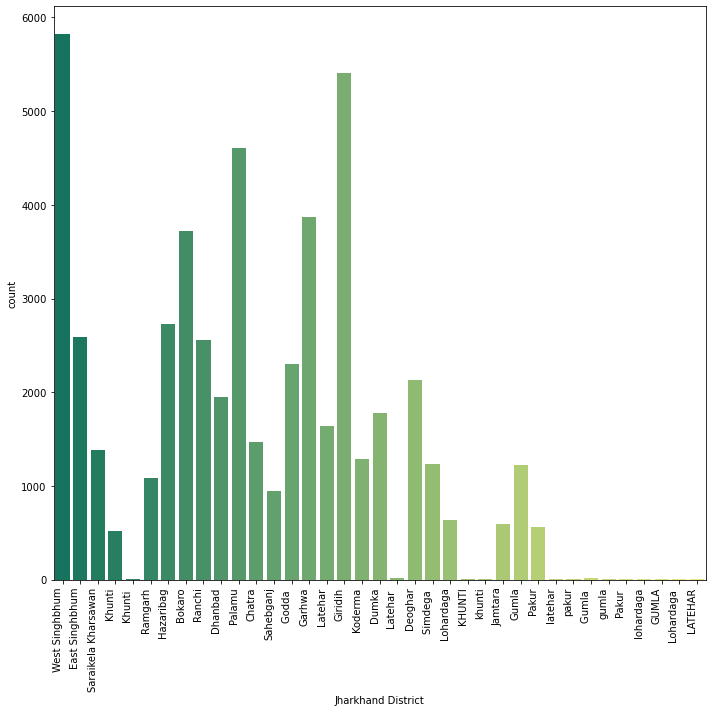

In [79]:
# Understanding District Wise Migration, 
plt.figure(figsize=(10,10))
bar_plot = sns.countplot(x="Jharkhand District", data = jharkhand_migration, palette='summer')
bar_plot.set_xticklabels(bar_plot.get_xticklabels(), rotation=90, ha="right")
plt.tight_layout()
plt.show()